In [4]:
index?

Object `index` not found.


**Step 1: Import the data to clean**

Kaiwen

In [1]:
#!pip install kaggle --upgrade
from google.colab import drive
drive.mount('/content/drive')
!cp -r /content/drive/MyDrive/kaggle.json /content
drive.flush_and_unmount()

Mounted at /content/drive


In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
import kaggle
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
import seaborn as sns

!kaggle datasets download -d kritikseth/us-airbnb-open-data

us-airbnb-open-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/us-airbnb-open-data.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
# preview the csv file

Airbnbdata = pd.read_csv('/content/AB_US_2023.csv')
print(Airbnbdata.head(3))

     id                                               name  host_id  \
0   958              Bright, Modern Garden Unit - 1BR/1BTH     1169   
1  5858                                 Creative Sanctuary     8904   
2  8142  Friendly Room Apt. Style -UCSF/USF - San Franc...    21994   

          host_name neighbourhood_group     neighbourhood  latitude  \
0             Holly                 NaN  Western Addition  37.77028   
1  Philip And Tania                 NaN    Bernal Heights  37.74474   
2             Aaron                 NaN    Haight Ashbury  37.76555   

   longitude        room_type  price  minimum_nights  number_of_reviews  \
0 -122.43317  Entire home/apt    202               2                383   
1 -122.42089  Entire home/apt    235              30                111   
2 -122.45213     Private room     56              32                  9   

  last_review  reviews_per_month  calculated_host_listings_count  \
0  2023-02-19               2.31                             

<ipython-input-5-166d61e6c1b9>:3: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  Airbnbdata = pd.read_csv('/content/AB_US_2023.csv')


In [6]:
Airbnbdata = pd.read_csv('/content/AB_US_2020.csv')
Airbnbdata.head(3)

<ipython-input-6-8f03415048ff>:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  Airbnbdata = pd.read_csv('/content/AB_US_2020.csv')


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
0,38585,Charming Victorian home - twin beds + breakfast,165529,Evelyne,NaN,28804,35.65146,-82.62792,Private room,60,1,138,16/02/20,1.14,1,0,Asheville
1,80905,French Chic Loft,427027,Celeste,NaN,28801,35.59779,-82.55540,Entire home/apt,470,1,114,07/09/20,1.03,11,288,Asheville
2,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,Lisa,NaN,28801,35.60670,-82.55563,Entire home/apt,75,30,89,30/11/19,0.81,2,298,Asheville


**Step 2: Cleanup**

In [7]:
#Fixing inconsistent Column Names
Airbnbdata.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'city'],
      dtype='object')

**Step 3: Statistical Analysis**

In [8]:
#Renaming Columns
Airbnbdata.rename(columns={'ID':'LISTING_ID','NAME':'LISTING_NAME','NEIGHBOURHOOD_GROUP':'REGION','ROOM_TYPE':'LISTING_TYPE','AVAILABILTY_365':'ANNUAL_AVAILABILTY','LAST_REVIEW':'LAST_REVIEW_DATE','NEIGHBOURHOOD':'NEIGHBORHOOD','CALCULATED_HOST_LISTINGS_COUNT':'HOST_TOTAL_LISTINGS'})

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
0,38585,Charming Victorian home - twin beds + breakfast,165529,Evelyne,NaN,28804,35.651460,-82.627920,Private room,60,1,138,16/02/20,1.14,1,0,Asheville
1,80905,French Chic Loft,427027,Celeste,NaN,28801,35.597790,-82.555400,Entire home/apt,470,1,114,07/09/20,1.03,11,288,Asheville
2,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,Lisa,NaN,28801,35.606700,-82.555630,Entire home/apt,75,30,89,30/11/19,0.81,2,298,Asheville
3,155305,Cottage! BonPaul + Sharky's Hostel,746673,BonPaul,NaN,28806,35.578640,-82.595780,Entire home/apt,90,1,267,22/09/20,2.39,5,0,Asheville
4,160594,Historic Grove Park,769252,Elizabeth,NaN,28801,35.614420,-82.541270,Private room,125,30,58,19/10/15,0.52,1,0,Asheville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226025,45506143,"DC Hidden In Plain ""Site""",25973146,Marci,NaN,"Downtown, Chinatown, Penn Quarters, Mount Vern...",38.903880,-77.029730,Entire home/apt,104,1,0,NaN,NaN,2,99,Washington D.C.
226026,45511428,DC 3 BR w/ screen porch 3 blck to metro w/ par...,231133074,Thomas,NaN,"Brookland, Brentwood, Langdon",38.920820,-76.990980,Entire home/apt,151,2,0,NaN,NaN,1,300,Washington D.C.
226027,45514685,Charming Penthouse Apt w/ Rooftop Terrace in L...,33758935,Bassem,NaN,"Shaw, Logan Circle",38.911170,-77.033540,Entire home/apt,240,2,0,NaN,NaN,1,173,Washington D.C.
226028,45516412,Adams Morgan/Nat'l Zoo 1 BR Apt #32,23193071,Michael,NaN,"Kalorama Heights, Adams Morgan, Lanier Heights",38.926630,-77.044360,Entire home/apt,60,21,0,NaN,NaN,5,362,Washington D.C.


In [9]:
#Finding any missing data
Airbnbdata.isnull()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226025,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False
226026,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False
226027,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False
226028,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False


In [10]:
#checking if the entire dataset nas null values
Airbnbdata.isnull().any().any()

True

In [11]:
#Columns with NAN using integer to see how many are null
Airbnbdata.isnull().sum()

id                                     0
name                                  28
host_id                                0
host_name                             33
neighbourhood_group               115845
neighbourhood                          0
latitude                               0
longitude                              0
room_type                              0
price                                  0
minimum_nights                         0
number_of_reviews                      0
last_review                        48602
reviews_per_month                  48602
calculated_host_listings_count         0
availability_365                       0
city                                   0
dtype: int64

In [12]:
#Dealing with missing data by adding a default value in the rows
column_to_fill = 'last_review'
default_text = 'N/A'
Airbnbdata[column_to_fill] = Airbnbdata[column_to_fill].fillna(default_text)

Column_to_fill = 'reviews_per_month'
DEFAULT = 0
Airbnbdata[Column_to_fill]=Airbnbdata[Column_to_fill].fillna(DEFAULT)


In [13]:
#Removing unecessary columns
columns_remove =['latitude','longitude']
Airbnbdata = Airbnbdata.drop(columns=columns_remove)

In [14]:
#Capitalizing column headings
Airbnbdata.columns.str.upper()

Index(['ID', 'NAME', 'HOST_ID', 'HOST_NAME', 'NEIGHBOURHOOD_GROUP',
       'NEIGHBOURHOOD', 'ROOM_TYPE', 'PRICE', 'MINIMUM_NIGHTS',
       'NUMBER_OF_REVIEWS', 'LAST_REVIEW', 'REVIEWS_PER_MONTH',
       'CALCULATED_HOST_LISTINGS_COUNT', 'AVAILABILITY_365', 'CITY'],
      dtype='object')

In [15]:
#Capitalizing column headings
Airbnbdata.columns = Airbnbdata.columns.str.upper()

In [16]:
#Drop Duplicate Rows
Airbnbdata.shape

(226030, 15)

In [17]:
#Drop Duplicate Rows  (Column,row)
Airbnbdata = Airbnbdata.dropna()

In [18]:
 Airbnbdata.shape

(110144, 15)

In [19]:
#preview the clean data
Airbnbdata.head(3)

,ID,NAME,HOST_ID,HOST_NAME,NEIGHBOURHOOD_GROUP,NEIGHBOURHOOD,ROOM_TYPE,PRICE,MINIMUM_NIGHTS,NUMBER_OF_REVIEWS,LAST_REVIEW,REVIEWS_PER_MONTH,CALCULATED_HOST_LISTINGS_COUNT,AVAILABILITY_365,CITY
48150,5065,MAUKA BB,7257,Wayne,Hawaii,Hamakua,Entire home/apt,85,2,42,22/03/20,0.45,2,365,Hawaii
48151,5269,Upcountry Hospitality in the 'Auwai Suite,7620,Lea & Pat,Hawaii,South Kohala,Entire home/apt,124,30,10,01/03/20,0.09,5,261,Hawaii
48152,5387,Hale Koa Studio & 1 Bedroom Units!!,7878,Edward,Hawaii,South Kona,Entire home/apt,85,5,168,18/03/20,1.30,3,242,Hawaii


In [20]:
# Counting the price frequency base on the neighbourhood
Airbnbdata_counts = Airbnbdata[['NEIGHBOURHOOD', 'PRICE']].value_counts().reset_index().sort_values(by='NEIGHBOURHOOD', ascending=True)
Airbnbdata_counts

,NEIGHBOURHOOD,PRICE,0
28773,Acton,255,1
32031,Acton,104,1
24179,Acton,58,1
28782,Adams,623,1
28783,Adams,495,1
...,...,...,...
16150,Yesler Terrace,65,1
16141,Yesler Terrace,180,1
15543,Yesler Terrace,130,2
16189,Yesler Terrace,104,1


In [21]:
# The minimum price for each neighbourhood
Airbnbdata_min = Airbnbdata.groupby('NEIGHBOURHOOD')['PRICE'].min()
Airbnbdata_min

NEIGHBOURHOOD
Acton               58
Adams               49
Adams-Normandie     25
Agoura Hills        40
Agua Dulce          35
                  ... 
Woodlawn            30
Woodrow            700
Woodside            15
Woonsocket          45
Yesler Terrace      60
Name: PRICE, Length: 635, dtype: int64

In [22]:
# The maximum price for each neighbourhood
Airbnbdata_max = Airbnbdata.groupby('NEIGHBOURHOOD')['PRICE'].max()
Airbnbdata_max

NEIGHBOURHOOD
Acton               255
Adams               623
Adams-Normandie     300
Agoura Hills       1995
Agua Dulce         1143
                   ... 
Woodlawn            250
Woodrow             700
Woodside            299
Woonsocket          239
Yesler Terrace      195
Name: PRICE, Length: 635, dtype: int64

In [23]:
# Calculate the difference between the maximum and minimum values
Airbnbdata_range = Airbnbdata_max - Airbnbdata_min
Airbnbdata_range

NEIGHBOURHOOD
Acton               197
Adams               574
Adams-Normandie     275
Agoura Hills       1955
Agua Dulce         1108
                   ... 
Woodlawn            220
Woodrow               0
Woodside            284
Woonsocket          194
Yesler Terrace      135
Name: PRICE, Length: 635, dtype: int64

In [24]:
# Standard deviation within each neighbourhood
Airbnbdata_std = Airbnbdata.groupby('NEIGHBOURHOOD')['PRICE'].std()
Airbnbdata_std_notnull = Airbnbdata_std[Airbnbdata_std.notnull()]
Airbnbdata_std_notnull

NEIGHBOURHOOD
Acton              103.058236
Adams              102.834680
Adams-Normandie     66.912799
Agoura Hills       384.627478
Agua Dulce         323.441733
                      ...    
Woodland Hills     606.281755
Woodlawn            75.385223
Woodside            45.813274
Woonsocket          63.374767
Yesler Terrace      36.592621
Name: PRICE, Length: 619, dtype: float64

In [25]:
# Mean within each neighbourhood
Airbnbdata_mean = Airbnbdata.groupby('NEIGHBOURHOOD')['PRICE'].mean()
std_index = Airbnbdata_std.dropna().index
mean_std_index = Airbnbdata_mean.loc[std_index]
mean_std_index

NEIGHBOURHOOD
Acton              139.000000
Adams              146.313043
Adams-Normandie     83.828571
Agoura Hills       225.026316
Agua Dulce         220.357143
                      ...    
Woodland Hills     236.554745
Woodlawn            99.750000
Woodside            59.606322
Woonsocket          91.111111
Yesler Terrace     109.407407
Name: PRICE, Length: 619, dtype: float64

Please enter the neighbourhood(ENTER 0 TO EXIT): Woonsocket


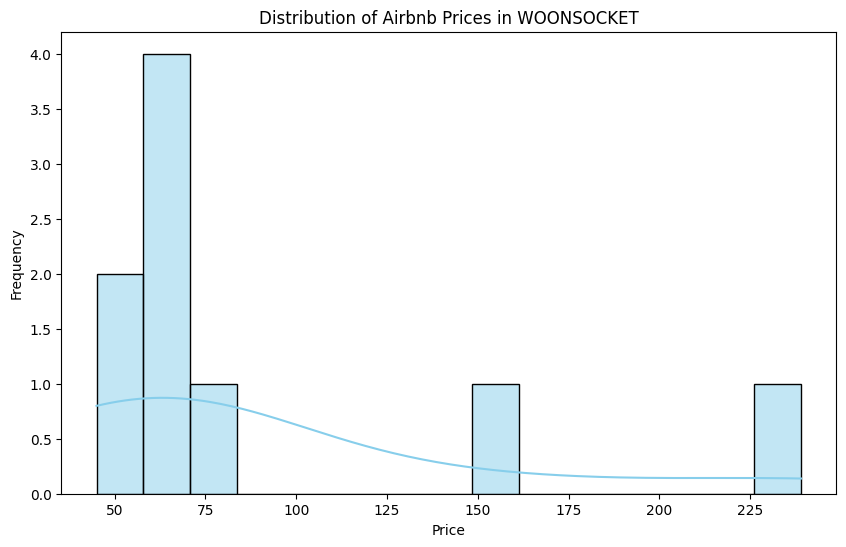

Outliers in WOONSOCKET:
          HOST_ID  PRICE
172441  128022283    150
173233  262589226    239
Please enter the neighbourhood(ENTER 0 TO EXIT): 0


In [29]:
# Distribution and Outliner based on end user's input

# Uppercase all values in the neighbourhood column
Airbnbdata['NEIGHBOURHOOD'] = Airbnbdata['NEIGHBOURHOOD'].str.upper()

# Create a while loop if the user wanted to see more than one neighbourhood
while True:
  selected_neighbourhood = input('Please enter the neighbourhood(ENTER 0 TO EXIT): ').upper()

  # Plot the distribution based on the end user's input
  if selected_neighbourhood in Airbnbdata['NEIGHBOURHOOD'].values:
    neighbourhood_data = Airbnbdata[Airbnbdata['NEIGHBOURHOOD'] == selected_neighbourhood] # Airbnbdata['NEIGHBOURHOOD'] == 'Acton' is a boolean mask
    pl.figure(figsize=(10, 6))
    sns.histplot(neighbourhood_data['PRICE'], kde=True, color='skyblue')
    pl.title(f'Distribution of Airbnb Prices in {selected_neighbourhood}')
    pl.xlabel('Price')
    pl.ylabel('Frequency')
    pl.show()

    # Outliner based on the neighbourhood
    Q1 = neighbourhood_data['PRICE'].quantile(0.25)
    Q3 = neighbourhood_data['PRICE'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = (neighbourhood_data['PRICE'] < lower_bound) | (neighbourhood_data['PRICE'] > upper_bound)

    # Display outliers
    print(f'Outliers in {selected_neighbourhood}:')
    print(neighbourhood_data.loc[outliers, ['HOST_ID', 'PRICE']])

  elif selected_neighbourhood == "0":
        break

  else:
    print(f'Neighborhood "{selected_neighbourhood}" not found.')

**Step 4: Visualization**

**Step 5: Export the clean data to a database**